## First website 

 http get requests and checking for errors

In [52]:
import requests

# URL of the website 
url = 'https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.KD.ZG&country='

# Make a GET request to the website
response = requests.get(url)

# Print the status code of the response
print(response.status_code)

# Print the content of the response
print(response.content)

200
b'\r\n\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7 ]> <html class="ie6"> <![endif]-->\r\n<!--[if IE 7 ]>    <html class="ie7"> <![endif]-->\r\n<!--[if IE 8 ]>    <html class="ie8"> <![endif]-->\r\n<!--[if IE 9 ]>    <html class="ie9"> <![endif]-->\r\n<!--[if (gt IE 9)|!(IE)]><!-->\r\n<html dir="ltr">\r\n<!--<![endif]-->\r\n\r\n<head>\r\n    <script type="text/javascript" charset=\'UTF-8\' src="/js/appdynamics.js">\r\n    </script>\r\n    <meta name="referrer" content="no-referrer" />\r\n    <title>World Development Indicators | DataBank</title>\r\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\r\n    \r\n    <meta name="description" content="World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, r

In [53]:
import requests
url = 'https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.KD.ZG&country='

try:

   response = requests.get(url)
   response.raise_for_status()

except requests.exceptions.HTTPError as errh:
  print("HTTP ERROR " , errh)
except requests.exceptions.ConnectionError as errc:
   print("connection error ")

except requests.exceptions.Timeout as errt:
   print("TIMEOUT Error")

except requests.exceptions.RequestException as errr:
   print("Try again later")

 Using beatifulSoup to prettify and extract the data

In [54]:
from bs4 import BeautifulSoup
# Create a BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')

# Print out the nicely formatted HTML
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html class="ie6"> <![endif]-->
<!--[if IE 7 ]>    <html class="ie7"> <![endif]-->
<!--[if IE 8 ]>    <html class="ie8"> <![endif]-->
<!--[if IE 9 ]>    <html class="ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html dir="ltr">
 <!--<![endif]-->
 <head>
  <script charset="UTF-8" src="/js/appdynamics.js" type="text/javascript">
  </script>
  <meta content="no-referrer" name="referrer"/>
  <title>
   World Development Indicators | DataBank
  </title>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates. [Note: Even though Global Development Finance (GDF) is no longer liste

 getting the colomns ( years)

In [55]:
years_first_web = soup.find_all('span', class_='grid-column-text')

# Iterate over each Tag in span_tags and print its text with a space separator
for tag in years_first_web:
    print(tag.text)



1990
2000
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


extracting the countries list

In [56]:
countries_first_web = soup.find_all('td',  class_ = 'colhead dxgvFixedColumn_GridDefaultTheme dxgv mv')
for tags in countries_first_web:
  print(tags.text )

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba


extract the even values data

In [57]:
from bs4 import BeautifulSoup

even_values_first = soup.find_all('td', class_="even curr dir-en dxgv")

# Tuple to store the printed values
result_tuple_even_first = ()

for tags in even_values_first:
    current_value = tags.text.strip()
  ##  print(current_value)
    
    # Append the current value to the tuple
    result_tuple_even_first += (current_value,)

# Print the final tuple
print("Result Tuple for even tags:", result_tuple_even_first)


Result Tuple for even tags: ('..', '5.6', '1.5', '2.6', '3.9', '-20.7', '-9.6', '1.0', '2.2', '3.8', '2.1', '8.9', '0.8', '2.8', '3.7', '1.3', '1.0', '3.4', '..', '-2.5', '3.1', '-7.0', '-0.5', '-0.8', '3.8', '-3.5', '1.4', '0.3', '2.0', '8.3', '-3.5', '5.0', '0.9', '-0.1', '-0.7', '1.2', '3.0', '0.5', '1.4', '2.5', '3.1', '8.2', '-2.5', '2.4', '2.7', '2.8', '-2.0', '10.7', '..', '3.3', '3.2', '7.5', '7.6', '5.8', '4.0', '6.4', '-0.6', '7.0', '-2.3', '27.6', '3.6', '2.6', '2.2', '2.3', '2.2', '2.1', '4.3', '0.0', '1.0', '2.3', '1.5', '4.2', '..', '5.8', '1.1', '0.2', '2.5', '5.6', '-1.6', '-2.9', '1.0', '2.5', '-0.7', '17.0', '4.4', '5.4', '2.5', '4.3', '2.2', '2.7', '5.6', '6.0', '6.6', '6.6', '7.9', '6.9', '-3.3', '-1.3', '2.4', '0.5', '0.3', '-0.8', '..', '1.0', '-3.8', '2.5', '1.4', '2.4', '3.1', '0.5', '2.0', '1.6', '2.2', '6.9', '9.5', '4.4', '3.2', '-1.8', '4.2', '17.9', '9.0', '7.2', '1.8', '5.7', '6.9', '7.2', '0.0', '-0.3', '0.8', '3.6', '0.3', '3.0', '10.4', '2.1', '6.6', '4

extracting the odd values

In [58]:
odd_values_first = soup.find_all('td', class_="odd curr dir-en dxgv")
additional_number_class_first = "dxgvPHEC odd curr dir-en dxgv"

# Counter to keep track of iterations
counter = 0

# Iterator for additional numbers
additional_number_iterator_first = iter(soup.find_all('td', class_=additional_number_class_first))

# Tuple to store the printed values
result_tuple_odd_first = ()

for tags in odd_values_first:
    current_value = tags.text.strip()
  #  print(current_value)
    
    # Append the current value to the tuple
    result_tuple_odd_first += (current_value,)

    # Increment the counter after each iteration
    counter += 1
    
    # Check if 5 iterations are completed
    if counter % 5 == 0:
        try:
            # Fetch the additional number from the specified class
            additional_number_tag = next(additional_number_iterator_first)
            additional_number_value = additional_number_tag.text.strip()
            
            
            # Append the additional number to the tuple
            result_tuple_odd_first += (additional_number_value,)
        except StopIteration:
            # If there are no more additional numbers, break the loop
            break
            
        # Reset the counter after processing every 5 numbers
        counter = 0

# Print the final tuple
print("Result Tuple:", result_tuple_odd_first)




Result Tuple: ('..', '2.7', '2.3', '1.2', '-2.4', '..', '6.9', '1.8', '3.3', '4.0', '-3.3', '4.9', '3.8', '3.8', '3.2', '1.2', '-5.1', '3.2', '..', '1.8', '-1.7', '2.7', '4.4', '1.7', '3.5', '2.5', '3.7', '1.6', '-11.2', '8.8', '3.1', '4.8', '-2.6', '-1.3', '-5.6', '3.0', '6.2', '2.2', '4.1', '7.0', '-18.9', '9.5', '-0.8', '-2.5', '-2.1', '-2.6', '-9.9', '5.0', '5.9', '3.6', '0.2', '5.2', '-7.2', '12.6', '7.6', '-1.6', '1.7', '2.4', '-24.0', '10.5', '3.9', '2.6', '2.8', '2.9', '-0.3', '4.3', '3.4', '0.7', '2.0', '2.4', '-6.6', '4.8', '11.1', '2.8', '-3.1', '1.5', '-4.3', '4.6', '4.1', '1.8', '-0.8', '2.9', '-23.5', '14.4', '5.3', '4.4', '3.6', '2.1', '-4.6', '4.9', '5.3', '6.1', '7.1', '7.3', '3.4', '7.1', '4.4', '0.0', '2.5', '-0.9', '-12.7', '11.3', '5.8', '1.7', '-2.5', '3.1', '-0.7', '-4.7', '3.7', '1.6', '1.3', '1.8', '-5.3', '3.0', '12.2', '4.0', '0.0', '1.1', '-13.7', '8.7', '5.9', '6.4', '3.3', '6.7', '3.8', '6.3', '9.3', '-3.7', '-0.7', '-0.4', '-6.8', '2.9', '3.4', '5.8', '8.

merginf the data in order in one tuple

In [59]:

# Merging the tuples by interleaving their elements into one large tuple
merged_large_tuple_first = ()

# Determine the length of the tuples 
length = len(result_tuple_even_first)

# Interleave the elements from both tuples
for i in range(length):
    merged_large_tuple_first += (result_tuple_even_first[i], result_tuple_odd_first[i])

# Print the merged large tuple
print("Merged Large Tuple:", merged_large_tuple_first)

Merged Large Tuple: ('..', '..', '5.6', '2.7', '1.5', '2.3', '2.6', '1.2', '3.9', '-2.4', '-20.7', '..', '-9.6', '6.9', '1.0', '1.8', '2.2', '3.3', '3.8', '4.0', '2.1', '-3.3', '8.9', '4.9', '0.8', '3.8', '2.8', '3.8', '3.7', '3.2', '1.3', '1.2', '1.0', '-5.1', '3.4', '3.2', '..', '..', '-2.5', '1.8', '3.1', '-1.7', '-7.0', '2.7', '-0.5', '4.4', '-0.8', '1.7', '3.8', '3.5', '-3.5', '2.5', '1.4', '3.7', '0.3', '1.6', '2.0', '-11.2', '8.3', '8.8', '-3.5', '3.1', '5.0', '4.8', '0.9', '-2.6', '-0.1', '-1.3', '-0.7', '-5.6', '1.2', '3.0', '3.0', '6.2', '0.5', '2.2', '1.4', '4.1', '2.5', '7.0', '3.1', '-18.9', '8.2', '9.5', '-2.5', '-0.8', '2.4', '-2.5', '2.7', '-2.1', '2.8', '-2.6', '-2.0', '-9.9', '10.7', '5.0', '..', '5.9', '3.3', '3.6', '3.2', '0.2', '7.5', '5.2', '7.6', '-7.2', '5.8', '12.6', '4.0', '7.6', '6.4', '-1.6', '-0.6', '1.7', '7.0', '2.4', '-2.3', '-24.0', '27.6', '10.5', '3.6', '3.9', '2.6', '2.6', '2.2', '2.8', '2.3', '2.9', '2.2', '-0.3', '2.1', '4.3', '4.3', '3.4', '0.0', 

making the csv file

In [60]:
import csv

# Extract text content of the years
year_texts = [year.text.strip() for year in years_first_web]


# Create a list of rows for the CSV
data_rows = []

# Iterate over the countries and distribute data across columns
for i in range(0, len(merged_large_tuple_first), len(years_first_web)):
    
    country_name = countries_first_web[i // len(years_first_web)].text.strip()
    row = [country_name] + list(merged_large_tuple_first[i:i + len(year_texts)])
    data_rows.append(row)

# Specify the CSV file path
csv_file_path = 'gdp_annual.csv'

# Write data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Write header row with years
    header_row = ['Country'] + year_texts
    csv_writer.writerow(header_row)
    
    # Write data rows
    csv_writer.writerows(data_rows)

print(f"CSV file '{csv_file_path}' has been created.")


CSV file 'gdp_annual.csv' has been created.


## second website

In [61]:
import requests
url = 'https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country='
response1 = requests.get(url)
print(response1.status_code)
print(response1.content)

200
b'\r\n\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7 ]> <html class="ie6"> <![endif]-->\r\n<!--[if IE 7 ]>    <html class="ie7"> <![endif]-->\r\n<!--[if IE 8 ]>    <html class="ie8"> <![endif]-->\r\n<!--[if IE 9 ]>    <html class="ie9"> <![endif]-->\r\n<!--[if (gt IE 9)|!(IE)]><!-->\r\n<html dir="ltr">\r\n<!--<![endif]-->\r\n\r\n<head>\r\n    <script type="text/javascript" charset=\'UTF-8\' src="/js/appdynamics.js">\r\n    </script>\r\n    <meta name="referrer" content="no-referrer" />\r\n    <title>World Development Indicators | DataBank</title>\r\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\r\n    \r\n    <meta name="description" content="World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, r

In [62]:
url = 'https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country='
try:
  response1 = requests.get(url)
  response1.raise_for_status()
except requests.exceptions.HTTPError as errh:
  print ("Http Error:",errh)
except requests.exceptions.Timeout as errt:
  print("Timeout error:" , errt)
except requests.exceptions.ConnectionError as eerc:
  print("connection error" , eerc)
except requests.exceptions.RequestException as err:
  print("please try again later")

 BeautifulSoup to prettify the html

In [63]:
from bs4 import BeautifulSoup
Soup1 = BeautifulSoup(response1.content, "html.parser")
print(Soup1.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html class="ie6"> <![endif]-->
<!--[if IE 7 ]>    <html class="ie7"> <![endif]-->
<!--[if IE 8 ]>    <html class="ie8"> <![endif]-->
<!--[if IE 9 ]>    <html class="ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html dir="ltr">
 <!--<![endif]-->
 <head>
  <script charset="UTF-8" src="/js/appdynamics.js" type="text/javascript">
  </script>
  <meta content="no-referrer" name="referrer"/>
  <title>
   World Development Indicators | DataBank
  </title>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates. [Note: Even though Global Development Finance (GDF) is no longer liste

 extracting the years

In [64]:
years_second_web = Soup1.find_all('span', class_="grid-column-text")
for tags in years_second_web:
  print(tags.text)

1990
2000
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


Extracting the odd values data

In [65]:
odd_tag_sec = Soup1.find_all('td', class_="odd curr dir-en dxgv")
additional_number_class_sec = "dxgvPHEC odd curr dir-en dxgv"

# Counter to keep track of iterations
counter = 0

# Iterator for additional numbers
additional_number_iterator_sec = iter(Soup1.find_all('td', class_=additional_number_class_sec))

# Tuple to store the printed values
result_tuple_odd_sec = ()

for tags in odd_tag_sec:
    current_value = tags.text.strip()
  #  print(current_value)
    
    # Append the current value to the tuple
    result_tuple_odd_sec += (current_value,)

    # Increment the counter after each iteration
    counter += 1
    
    # Check if 5 iterations are completed
    if counter % 5 == 0:
        try:
            # Fetch the additional number from the specified class
            additional_number_tag = next(additional_number_iterator_sec)
            additional_number_value = additional_number_tag.text.strip()
            # Print the additional number
          #  print(additional_number_value)
            
            # Append the additional number to the tuple
            result_tuple_odd_sec += (additional_number_value,)
        except StopIteration:
            # If there are no more additional numbers, break the loop
            break
            
        # Reset the counter after processing every 5 numbers
        counter = 0

# Print the final tuple
print("Result Tuple:", result_tuple_odd_sec)


  


Result Tuple: ('7.9', '7.9', '10.1', '11.1', '11.7', '14.1', '19.0', '18.1', '15.4', '12.3', '12.8', '11.6', '29.8', '10.2', '10.2', '12.1', '14.0', '12.5', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '16.6', '16.3', '16.6', '16.6', '16.7', '14.5', '..', '..', '..', '..', '..', '..', '15.0', '7.3', '8.1', '9.2', '11.5', '6.8', '11.0', '12.0', '12.6', '13.2', '12.2', '8.6', '..', '..', '..', '..', '..', '..', '6.3', '6.1', '5.7', '5.3', '6.5', '3.7', '4.7', '5.7', '6.1', '4.9', '5.2', '5.0', '11.8', '4.9', '5.0', '4.9', '7.2', '5.7', '7.2', '13.8', '12.7', '10.0', '12.6', '10.1', '1.1', '1.1', '1.2', '1.2', '1.8', '1.3', '3.3', '4.4', '4.4', '4.4', '5.3', '4.3', '9.4', '12.2', '8.3', '8.3', '9.7', '8.5', '12.2', '5.9', '5.8', '4.8', '4.1', '3.6', '6.6', '8.5', '7.8', '6.0', '5.6', '5.6', '10.8', '8.2', '7.0', '7.9', '10.6', '8.7', '0.9', '1.8', '1.8', '1.5', '1.6', '1.5', '..', '..', '..', '..', '..', '..', '1.7', '2.6', '2.7', '3.4', '5.0', '6.0', '2.4', '2.

extracting the even values data

In [66]:
even_tag_sec = Soup1.find_all('td', class_="even curr dir-en dxgv")

# Tuple to store the printed values
result_tuple_even_sec = ()

for tags in even_tag_sec:
    current_value = tags.text.strip()
  ##  print(current_value)
    
    # Append the current value to the tuple
    result_tuple_even_sec += (current_value,)

# Print the final tuple
print("Result Tuple for even tags:", result_tuple_even_sec)

  

Result Tuple for even tags: ('..', '7.9', '9.0', '11.2', '11.1', '12.1', '..', '15.9', '17.2', '13.6', '11.5', '12.6', '..', '9.8', '11.2', '12.0', '12.3', '13.7', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '16.4', '16.4', '16.6', '16.5', '15.8', '..', '..', '..', '..', '..', '..', '..', '7.1', '7.6', '8.4', '9.8', '8.7', '..', '11.7', '12.3', '12.9', '12.2', '10.0', '..', '..', '..', '..', '..', '..', '..', '5.7', '6.1', '5.6', '5.2', '5.1', '..', '5.4', '5.8', '5.6', '4.6', '6.5', '..', '5.0', '5.0', '5.0', '5.0', '6.0', '..', '16.2', '12.0', '9.8', '9.9', '11.6', '..', '1.2', '1.2', '1.2', '1.2', '1.5', '..', '4.4', '4.4', '4.4', '4.4', '5.2', '..', '11.6', '9.8', '8.6', '8.4', '9.5', '..', '5.9', '5.9', '5.7', '4.2', '3.9', '..', '8.4', '8.5', '7.1', '5.4', '6.3', '..', '8.4', '7.6', '6.6', '9.1', '10.2', '..', '2.0', '1.8', '1.7', '1.4', '1.8', '..', '..', '..', '..', '..', '..', '..', '2.9', '2.5', '3.0', '2.7', '4.8', '..', '2.4', '3.1', '3.7',

countries list

In [67]:
countries_sec = soup.find_all('td', class_="colhead dxgvFixedColumn_GridDefaultTheme dxgv mv")
for tags in countries_sec:
  print(tags.text)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba


merging all data in one large tuple

In [68]:


# Merging the tuples by interleaving their elements into one large tuple
merged_large_tuple_sec = ()

# Determine the length of the tuples 
length = len(result_tuple_even_sec)

# Interleave the elements from both tuples
for i in range(length):
    merged_large_tuple_sec += (result_tuple_even_sec[i], result_tuple_odd_sec[i])

# Print the merged large tuple
print("Merged Large Tuple:", merged_large_tuple_sec)


Merged Large Tuple: ('..', '7.9', '7.9', '7.9', '9.0', '10.1', '11.2', '11.1', '11.1', '11.7', '12.1', '14.1', '..', '19.0', '15.9', '18.1', '17.2', '15.4', '13.6', '12.3', '11.5', '12.8', '12.6', '11.6', '..', '29.8', '9.8', '10.2', '11.2', '10.2', '12.0', '12.1', '12.3', '14.0', '13.7', '12.5', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '16.6', '16.4', '16.3', '16.4', '16.6', '16.6', '16.6', '16.5', '16.7', '15.8', '14.5', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '15.0', '7.1', '7.3', '7.6', '8.1', '8.4', '9.2', '9.8', '11.5', '8.7', '6.8', '..', '11.0', '11.7', '12.0', '12.3', '12.6', '12.9', '13.2', '12.2', '12.2', '10.0', '8.6', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '6.3', '5.7', '6.1', '6.1', '5.7', '5.6', '5.3', '5.2', '6.5', '5.1', '3.7', '..', '4.7', '5.4', '5.7', '5.8', '6.1', '5.6', '4.9', '4.6

Making the csv file

In [69]:
# Create a list of rows for the CSV
import csv

# Extract text content of the years
year_texts = [year.text.strip() for year in years_second_web]

# Create a list of rows for the CSV
data_rows = []

# Iterate over the countries and distribute data across columns
for i in range(0, len(merged_large_tuple_sec), len(years_second_web)):
    country_name = countries_sec[i // len(years_second_web)].text.strip()
    row = [country_name] + list(merged_large_tuple_sec[i:i + len(year_texts)])
    data_rows.append(row)

# Specify the CSV file path
csv_file_path = 'unemployment_rate.csv'

# Write data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Write header row with years
    header_row = ['Country'] + year_texts
    csv_writer.writerow(header_row)
    
    # Write data rows
    csv_writer.writerows(data_rows)

print(f"CSV file '{csv_file_path}' has been created.")



CSV file 'unemployment_rate.csv' has been created.


## Data preprocessing

Explore data before cleaning

In [70]:
import pandas as pd
df = pd.read_excel("data.xlsx")
# View the first few rows
print(df.head())

# View the last few rows
print(df.tail())



  Country Name  Year  GDP growth (annual %)  \
0  Afghanistan  2000               0.000000   
1  Afghanistan  2001               0.000000   
2  Afghanistan  2002               0.000000   
3  Afghanistan  2003               8.832278   
4  Afghanistan  2004               1.414118   

   Government expenditure, percent of GDP (% of GDP)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  
0                                              8.054                    
1                                              8.040                    
2                                              8.186                    
3                                              8.122                    
4              

In [71]:
# Check the data types
print("\n check the data types:")
print(df.dtypes)

# Check for missing values
print("\n check for missing values:")
print(df.isnull().sum())

# Summary statistics
print("\n show summary statistics:")
print(df.describe())

# Check for duplicates
print("\n check for duplicates:")
print(df.duplicated().sum())




 check the data types:
Country Name                                                            object
Year                                                                     int64
GDP growth (annual %)                                                  float64
Government expenditure, percent of GDP (% of GDP)                      float64
Unemployment, total (% of total labor force) (modeled ILO estimate)    float64
dtype: object

 check for missing values:
Country Name                                                              0
Year                                                                      0
GDP growth (annual %)                                                     0
Government expenditure, percent of GDP (% of GDP)                      3036
Unemployment, total (% of total labor force) (modeled ILO estimate)       0
dtype: int64

 show summary statistics:
              Year  GDP growth (annual %)  \
count  6118.000000            6118.000000   
mean   2011.000000           

Cleaning the data

In [72]:
# read the file first

df = pd.read_excel("data.xlsx")


# Read the data from the Excel file
df = pd.read_excel("data.xlsx")

# List of columns to check for null or zero values
columns_to_check = ['GDP growth (annual %)', 'Government expenditure, percent of GDP (% of GDP)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']

# Drop rows with null or zero values in the last 3 factors
df = df.dropna(subset=columns_to_check)
df = df.loc[~(df[columns_to_check] == 0).any(axis=1)]

# Remove all rows for each country if any of its rows have been dropped
df = df.groupby('Country Name').filter(lambda x: len(x) == df['Year'].nunique())

# Reset the index
df = df.reset_index(drop=True)

# Print the first few rows of the cleaned DataFrame
print(df.head())
df.to_excel("cleaned.xlsx", index=False)

  Country Name  Year  GDP growth (annual %)  \
0      Albania  2000               6.946217   
1      Albania  2001               8.293313   
2      Albania  2002               4.536524   
3      Albania  2003               5.528637   
4      Albania  2004               5.514668   

   Government expenditure, percent of GDP (% of GDP)  \
0                                          33.837998   
1                                          32.685008   
2                                          31.534585   
3                                          29.679964   
4                                          30.154813   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  
0                                             19.028                    
1                                             18.575                    
2                                             17.895                    
3                                             16.989                    
4              

visualize for insights

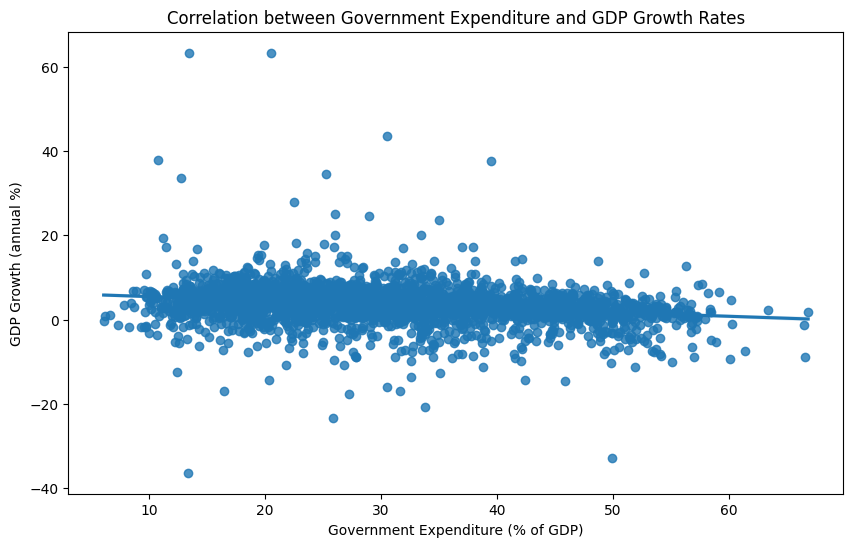

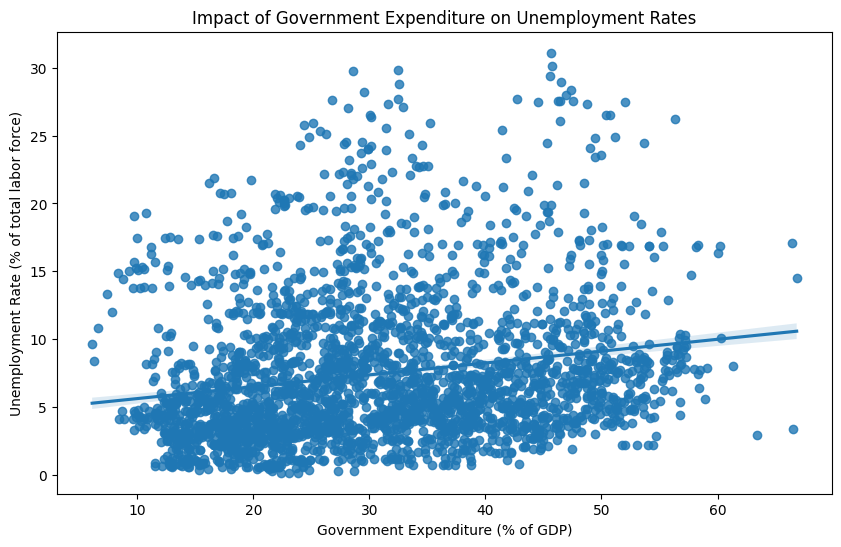

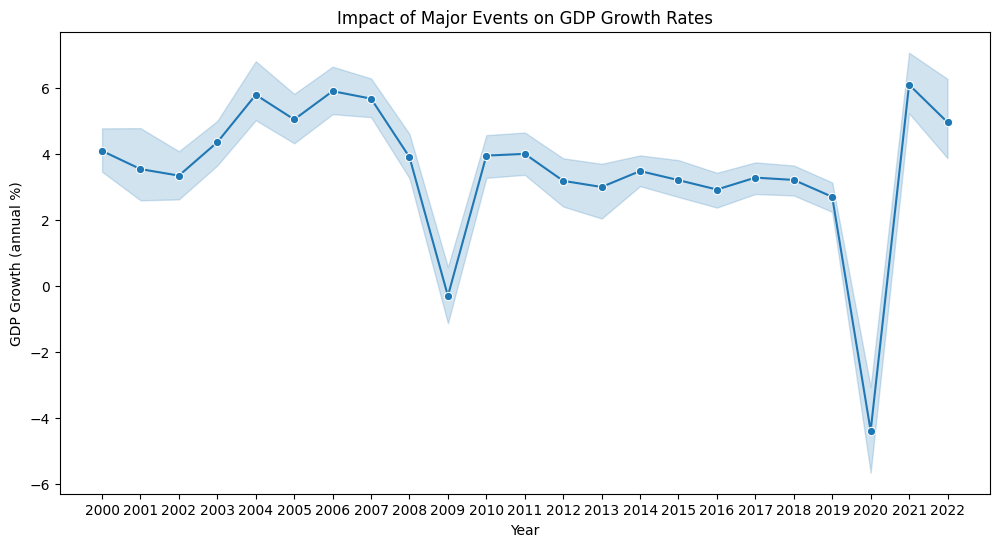

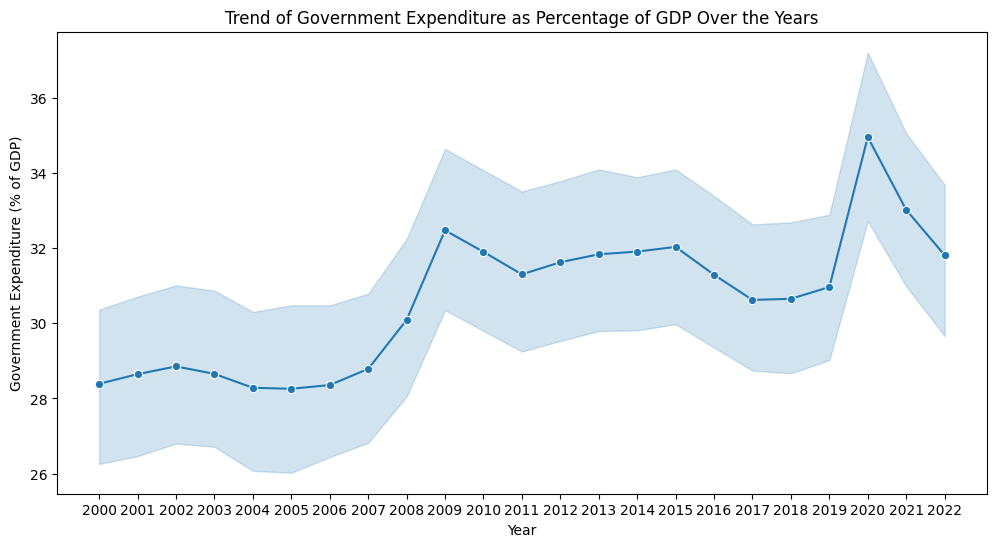

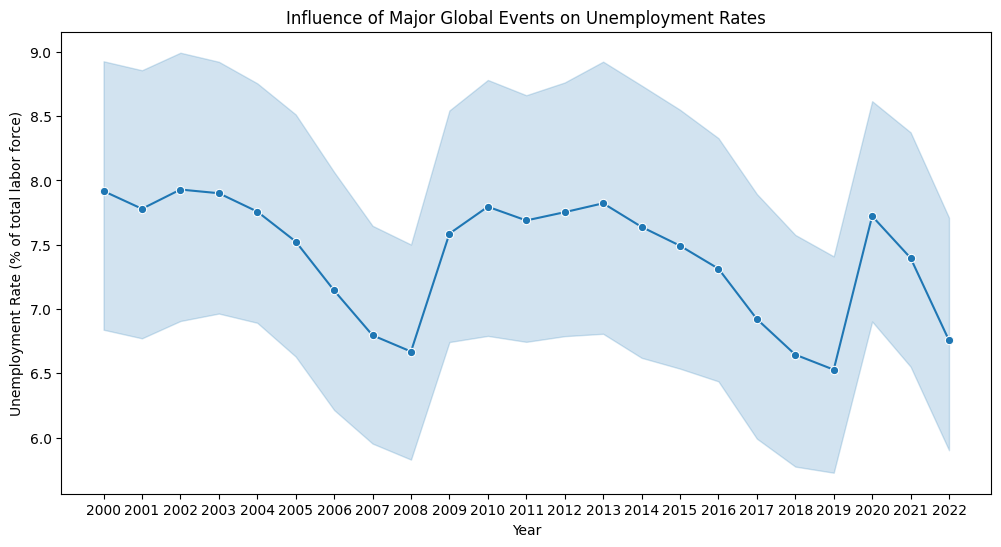

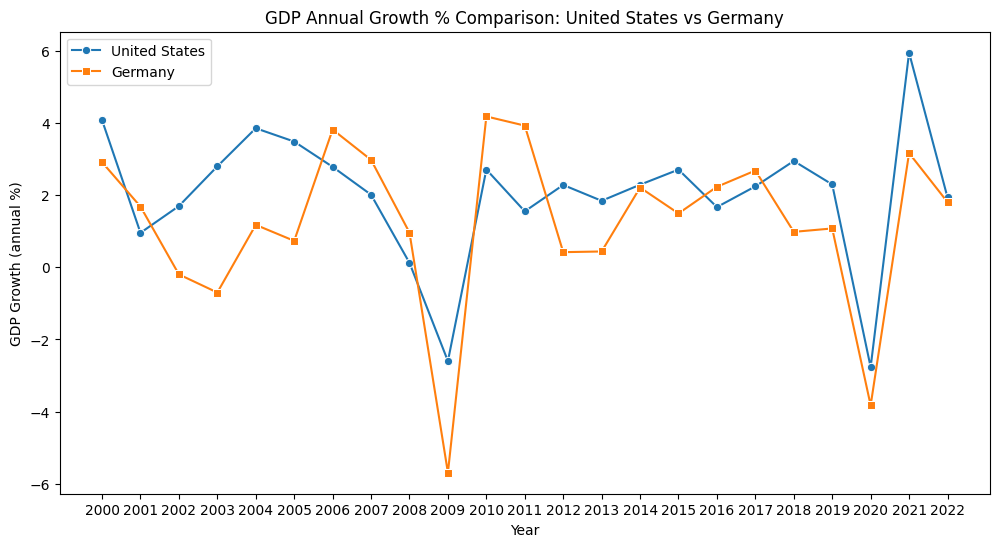

In [80]:

import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data from the Excel file
df_cleaned = pd.read_excel("cleaned.xlsx")

# Plot 1: Correlation between government expenditure and GDP growth rates
plt.figure(figsize=(10, 6))
sns.regplot(x='Government expenditure, percent of GDP (% of GDP)', y='GDP growth (annual %)', data=df_cleaned)
plt.title('Correlation between Government Expenditure and GDP Growth Rates')
plt.xlabel('Government Expenditure (% of GDP)')
plt.ylabel('GDP Growth (annual %)')
plt.show()

# Plot 2: Impact of government expenditure on unemployment rates
plt.figure(figsize=(10, 6))
sns.regplot(x='Government expenditure, percent of GDP (% of GDP)', y='Unemployment, total (% of total labor force) (modeled ILO estimate)', data=df_cleaned)
plt.title('Impact of Government Expenditure on Unemployment Rates')
plt.xlabel('Government Expenditure (% of GDP)')
plt.ylabel('Unemployment Rate (% of total labor force)')
plt.show()

# Plot 3: Impact of major events like COVID-19 on GDP growth rates
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP growth (annual %)', data=df_cleaned, marker='o')
plt.title('Impact of Major Events on GDP Growth Rates')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.xticks(range(2000, 2023, 1))
plt.show()
# Plot 4: Trend of government expenditure as percentage of GDP over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Government expenditure, percent of GDP (% of GDP)', data=df_cleaned, marker='o')
plt.title('Trend of Government Expenditure as Percentage of GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('Government Expenditure (% of GDP)')
plt.xticks(range(2000, 2023, 1))
plt.show()


# plot 5: Influence of Major Global Events on Unemployment Rates
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)', data=df_cleaned, marker='o')
plt.title('Influence of Major Global Events on Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (% of total labor force)')
# Set x-axis to display every year from 2000 to 2022
plt.xticks(range(2000, 2023, 1))
plt.show()

# Filter the data for the United States and germany
df_us = df_cleaned[df_cleaned['Country Name'] == 'United States']
df_germany = df_cleaned[df_cleaned['Country Name'] == 'Germany']

# Plot 6: GDP annual growth percentage for the United States and Germany
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP growth (annual %)', data=df_us, marker='o', label='United States')
sns.lineplot(x='Year', y='GDP growth (annual %)', data=df_germany, marker='s', label='Germany')
plt.title('GDP Annual Growth % Comparison: United States vs Germany')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.xticks(range(2000, 2023, 1))
plt.legend()
plt.show()






## insights gained from the graphs.



1- Government Expenditure and GDP Growth Rates: The data suggests a lack of significant correlation between government expenditure and GDP growth rates, indicating that changes in government spending may not have a substantial impact on economic growth.

2- Impact of Government Expenditure on Unemployment Rates: There is a slight increase in the unemployment rate with higher government expenditure (% of GDP). This phenomenon could be attributed to various factors such as the crowding out effect, resource misallocation, and dependency on government programs.

3- Impact of Major Events on GDP Growth Rates: The graph illustrates a substantial decrease in GDP growth rates in 2009 and 2020, aligning with the impacts of the 2008 financial crisis and the COVID-19 pandemic. The data suggests that COVID-19 had a more significant impact than the financial crisis on annual growth rates.

4- Trend of Government Expenditure Over the Years: Government expenditure (% of GDP) notably increased in 2009 and 2020, indicating higher spending to counter the effects of the financial crisis and COVID-19. The larger increase in 2021 underscores the greater impact of COVID-19 on necessitating increased government spending to recover.

5- Influence of Major Global Events on Unemployment Rates: Major events such as the 2008 financial crisis and COVID-19 slightly affected the unemployment rate, with both events leading to an increase of about 1-2% compared to the previous year.

6- Comparison of GDP Annual Growth % Between the United States and Germany: The data reveals that both the 2008 financial crisis and the COVID-19 pandemic had a significant impact on GDP annual growth rates in both the United States and Germany. However, Germany experienced a more pronounced decline in GDP growth rates compared to the United States during these crises. This suggests that the policy responses and economic resilience of the United States were more effective in mitigating the economic downturns caused by these events. Possible factors contributing to this difference could include the structure of the two economies, the effectiveness of government policies, and the degree of global interconnectedness. Further analysis could delve into specific policy measures implemented by each country and their effectiveness in supporting economic recovery.

## Decision Tree-Based Method

In [74]:

from sklearn.ensemble import RandomForestRegressor


X = df_cleaned[['GDP growth (annual %)', 'Government expenditure, percent of GDP (% of GDP)']]
y = df_cleaned['Unemployment, total (% of total labor force) (modeled ILO estimate)']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
print("Feature Importances:", importances)


Feature Importances: [0.4623287 0.5376713]


In [75]:

feature = df_cleaned[['Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Government expenditure, percent of GDP (% of GDP)']]
target = df_cleaned[ 'GDP growth (annual %)']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(feature, target)

# Get feature importances
importance = model.feature_importances_
print("Feature Importances:", importance)

Feature Importances: [0.48167731 0.51832269]


In [76]:

from sklearn.ensemble import RandomForestRegressor


x = df_cleaned[['Unemployment, total (% of total labor force) (modeled ILO estimate)','GDP growth (annual %)' ]]
Y = df_cleaned[ 'Government expenditure, percent of GDP (% of GDP)']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(x, Y)

# Get feature importances
important = model.feature_importances_
print("Feature Importances:", important)

Feature Importances: [0.49495598 0.50504402]
